In [38]:
import pandas as pd
%store -r my_data_nan

In [39]:
for key,df in my_data_nan.iteritems():
    if 'twitter' not in df.index:
        print key

twitter_df


In [40]:
tw_data = pd.DataFrame()
for key,df in my_data_nan.iteritems():
    if 'twitter' in df.index:
        new_df = df.loc['twitter'].rename(key.replace('_df','')).to_frame().reset_index().T
        new_df.columns = new_df.loc['year_month']
        new_df = new_df.drop(['year_month']) # (1,18)
        tw_data = tw_data.append(new_df)

In [41]:
tw_data.isnull().sum()

year_month
2016-10    27
2016-11    18
2016-12    21
2017-01    14
2017-02    18
2017-03    17
2017-04    21
2017-05     8
2017-06    12
2017-07     8
2017-08    14
2017-09    18
2017-10     7
2017-11    10
2017-12     9
2018-01    14
2018-02    14
2018-03    12
dtype: int64

In [42]:
tw_data = tw_data.dropna(how='any')  

In [43]:
tw_data

year_month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
giphy,0.00619896,0.00498307,0.00575565,0.0055769,0.00648691,0.00620658,0.00695899,0.00776187,0.00793012,0.00695137,0.0080663,0.00576125,0.00639511,0.00899687,0.00952191,0.00893365,0.00664063,0.00674699
bedbathandbeyond,0.0117131,0.0125157,0.0176622,0.0419377,0.0162779,0.00562192,0.0233322,0.0168415,0.0180012,0.0246096,0.0229566,0.0176933,0.0157289,0.0197606,0.0153887,0.0158036,0.0211772,0.0284705
citibankonline,0.0554748,0.0311148,0.0408556,0.0272889,0.0477437,0.0255559,0.0368657,0.0298871,0.0304781,0.0394624,0.0315867,0.038805,0.0392708,0.0545149,0.0343484,0.0565895,0.0675632,0.0421641
gofundme,0.0677652,0.0547392,0.0521668,0.0638274,0.0972541,0.0891347,0.083228,0.0850767,0.0752995,0.0865039,0.122363,0.129096,0.107224,0.159826,0.154882,0.169798,0.165758,0.17196
coursehero,0.00200626,0.0278485,0.00253883,0.012166,0.0225923,0.013029,0.00679036,0.00811154,0.00164232,0.00377542,0.00217902,0.0102184,0.0108377,0.0138881,0.0259751,0.0280107,0.0139474,0.011607
steampowered,0.106621,0.104829,0.0984809,0.0996741,0.123001,0.114494,0.109512,0.108653,0.0966857,0.0989131,0.100794,0.109886,0.109102,0.12073,0.104605,0.127132,0.122482,0.111782
howtogeek,0.0914332,0.0866078,0.104296,0.0875698,0.0676593,0.0761003,0.0972929,0.0981435,0.0963791,0.0741439,0.0614093,0.0786444,0.0771858,0.0574993,0.0418031,0.056467,0.0554997,0.0577596
thrillist,0.0219131,0.0157553,0.0228174,0.0209967,0.0191949,0.0205093,0.0184848,0.0181034,0.0173591,0.0256979,0.0232946,0.0150804,0.0231642,0.0421157,0.0374144,0.0232697,0.01976,0.0412163
history,0.0133922,0.0195742,0.0204068,0.02298,0.0229744,0.0274904,0.036811,0.0397628,0.0321133,0.055409,0.0427438,0.0512253,0.0363229,0.0406683,0.0297215,0.0188567,0.0240053,0.0139463
github,0.133565,0.129667,0.112098,0.120564,0.122579,0.117891,0.137957,0.124997,0.114103,0.128987,0.116062,0.135031,0.147369,0.147429,0.137928,0.157562,0.157787,0.148528


In [44]:
tw_avg_month = pd.DataFrame()
avg = []
for column in tw_data:
    avg.append(tw_data[column].mean()*100)

row = pd.Series(avg,tw_data.columns.values)
tw_avg_month = tw_avg_month.append([row],ignore_index=True)
tw_avg_month = tw_avg_month.transpose().reset_index().rename(index=str,columns={'index':'date',0:'avg_share'})

In [45]:
tw_avg_month

,date,avg_share
0,2016-10,7.181243
1,2016-11,7.263087
2,2016-12,7.195093
3,2017-01,7.840039
4,2017-02,7.905330
5,2017-03,7.954309
6,2017-04,7.842477
7,2017-05,7.962732
8,2017-06,8.042961
9,2017-07,8.014587


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import functions_social as fs

In [47]:
tw_data1 = tw_data*100.0
mb = tw_data1.T.reset_index()

In [48]:
df_long = pd.melt(mb,'year_month', var_name = 'site',value_name ='share' )
df_long['share'] = df_long['share'].astype(np.float)
df_long

,year_month,site,share
0,2016-10,giphy,0.619896
1,2016-11,giphy,0.498307
2,2016-12,giphy,0.575565
3,2017-01,giphy,0.557690
4,2017-02,giphy,0.648691
5,2017-03,giphy,0.620658
6,2017-04,giphy,0.695899
7,2017-05,giphy,0.776187
8,2017-06,giphy,0.793012
9,2017-07,giphy,0.695137


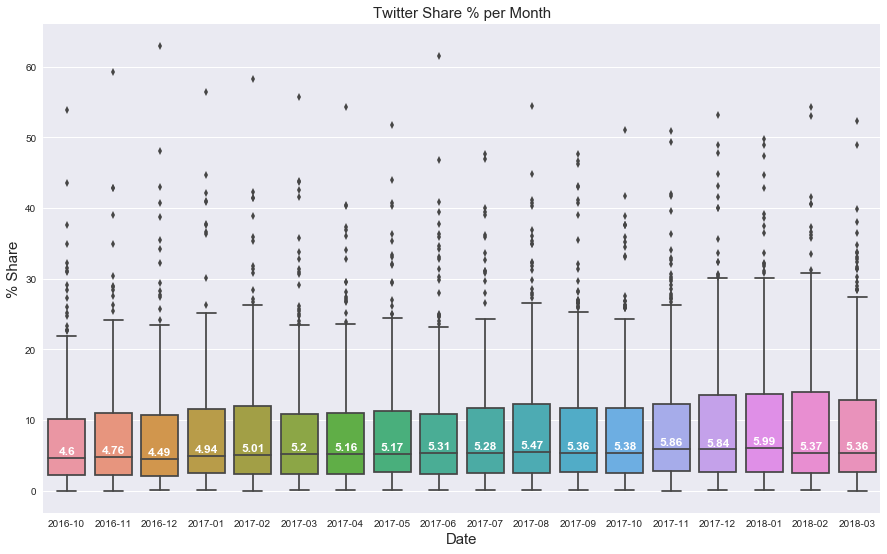

In [49]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='year_month',y='share',data=df_long)
#ax = sns.swarmplot(x='year_month',y='share',data=df_long)
medians = df_long.groupby(['year_month'])['share'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Twitter Share % per Month',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('% Share',fontsize=15)

plt.show()

In [50]:
#perc change from 2016-10 to 2017-10
tw_year_10 = tw_data[['2016-10','2017-10']]
tw_year_10['perc_change'] = (tw_data['2017-10']-tw_data['2016-10'])*100
tw_year_10 = tw_year_10.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

#perc change from 2016-11 to 2017-11
tw_year_11 = tw_data[['2016-11','2017-11']]
tw_year_11['perc_change'] = (tw_data['2017-11']-tw_data['2016-11'])*100
tw_year_11 = tw_year_11.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

tw_year_12 = tw_data[['2016-12','2017-12']]
tw_year_12['perc_change'] = (tw_data['2017-12']-tw_data['2016-12'])*100
tw_year_12 = tw_year_12.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

tw_year_1 = tw_data[['2017-01','2018-01']]
tw_year_1['perc_change'] = (tw_data['2018-01']-tw_data['2017-01'])*100
tw_year_1 = tw_year_1.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

tw_year_2 = tw_data[['2017-02','2018-02']]
tw_year_2['perc_change'] = (tw_data['2018-02']-tw_data['2017-02'])*100
tw_year_2 = tw_year_2.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

tw_year_3 = tw_data[['2017-03','2018-03']]
tw_year_3['perc_change'] = (tw_data['2018-03']-tw_data['2017-03'])*100
tw_year_3 = tw_year_3.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [51]:
tw_year_10['year_month'] = 'October'
tw_year_10 = tw_year_10.rename(columns={'year_month':'month'})
tw_year_10 = tw_year_10.iloc[:,-2:]


tw_year_11['year_month'] = 'November'
tw_year_11 = tw_year_11.rename(columns={'year_month':'month'})
tw_year_11 = tw_year_11.iloc[:,-2:]

tw_year_12['year_month'] = 'December'
tw_year_12 = tw_year_12.rename(columns={'year_month':'month'})
tw_year_12 = tw_year_12.iloc[:,-2:]

tw_year_1['year_month'] = 'January'
tw_year_1 = tw_year_1.rename(columns={'year_month':'month'})
tw_year_1 = tw_year_1.iloc[:,-2:]

tw_year_2['year_month'] = 'February'
tw_year_2 = tw_year_2.rename(columns={'year_month':'month'})
tw_year_2 = tw_year_2.iloc[:,-2:]

tw_year_3['year_month'] = 'March'
tw_year_3 = tw_year_3.rename(columns={'year_month':'month'})
tw_year_3 = tw_year_3.iloc[:,-2:]

tw_all = tw_year_10.append([tw_year_11,tw_year_12,tw_year_1,tw_year_2,tw_year_3])

tw_all['perc_change'] = tw_all['perc_change'].astype(float)

tw_all = tw_all.reset_index()
tw_all = tw_all[['perc_change','month']]

tw_all

year_month,perc_change,month
0,21.320223,October
1,18.744192,October
2,14.862374,October
3,13.578955,October
4,13.304791,October
5,13.146576,October
6,13.099165,October
7,13.076035,October
8,12.715703,October
9,12.259638,October


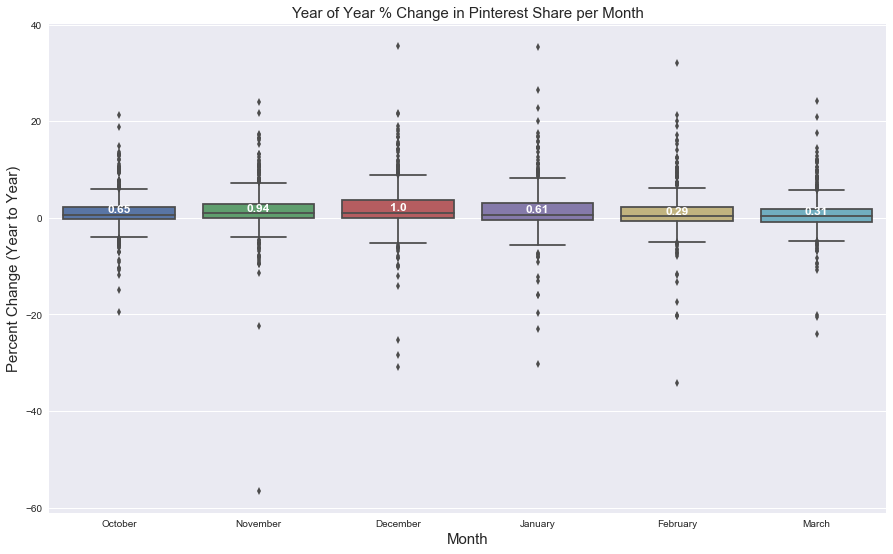

In [52]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='month',y='perc_change',data=tw_all)

medians = tw_all.groupby(['month'],sort=False)['perc_change'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Year of Year % Change in Pinterest Share per Month',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Percent Change (Year to Year)',fontsize=15)
plt.show()

In [54]:
%store tw_year_3

Stored 'tw_year_3' (DataFrame)
